# Decision Tree Baseada em Entropia

In [1]:
!pip install pydot

In [2]:
!pip install graphviz

In [3]:
# Importando os módulos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot
import graphviz
# No Mac: brew install graphviz
# No Windows: http://www.graphviz.org/
# No Linux: http://www.graphviz.org/

In [4]:
# Criando o dataset
instances = [
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Cachorro'},
    {'Melhor Amigo': False, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Gato'},
    {'Melhor Amigo': True, 'Especie': 'Cachorro'}
]

In [5]:
# Transformando o dicionário em DataFrame
df = pd.DataFrame(instances)

In [6]:
df

,Melhor Amigo,Especie
0,False,Cachorro
1,True,Cachorro
2,True,Gato
3,True,Gato
4,False,Gato
5,True,Gato
6,True,Gato
7,False,Cachorro
8,True,Gato
9,False,Cachorro


In [7]:
# Preparando os dados de treino e de teste
x_train = [[1] if a else [0] for a in df['Melhor Amigo']]
y_train = [1 if d == 'Cachorro' else 0 for d in df['Especie']]
labels = ['Melhor Amigo']

In [8]:
print(x_train)

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]


In [9]:
print(y_train)

[1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [10]:
# Construindo o Classificador
clf = DecisionTreeClassifier(max_depth = None,
                            max_features = None,
                            criterion = 'entropy',
                            min_samples_leaf = 1,
                            min_samples_split = 2)

In [11]:
# Apresentando os datasets ao Classificador
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
arquivo = './modelo/tree.dot'

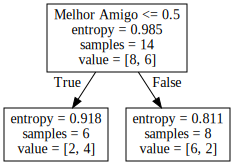

In [13]:
# Gerando o gráfico da árvore de decisão
export_graphviz(clf, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [14]:
!dot -Tpng './modelo/tree.dot' -o './images/tree.png'